© 2024 Nokia
Licensed under the BSD 3 Clause Clear License  
SPDX-License-Identifier: BSD-3-Clause-Clear

In [1]:
import os
import re

import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

from representation_similarity_utilities import compare_activations

# font import
import matplotlib.font_manager as fm
# Add every font at the specified location
font_dir = [os.path.join('..', '..', 'Work_Sans', 'static')]
for font in fm.findSystemFonts(font_dir):
    fm.fontManager.addfont(font)

sns.set(style='white', context="poster", font='DejaVu Sans')
similarity_function = 'cka'  # OPTIONS cka, cca

Code taken and adapted from this [Towards Data Science post](https://towardsdatascience.com/do-different-neural-networks-learn-the-same-things-ac215f2103c3)

# MIMIC Models

In [2]:
dataset = 'MIMIC'
models = [
    # os.path.join('SimCLR', dataset, '20230329-112506_l1_hs128_e100_esFalse_bs128_wTrue_rFalse', 'simclr.finetuned.0.75.hdf5'),
    # os.path.join('SimCLR', dataset, '20230403-115302_200_l2_hs128_e100_esFalse_bs128_wTrue_rFalse', 'simclr.finetuned.0.79.hdf5'),
    os.path.join('SimCLR', dataset, '20230403-120645_e100_esFalse_bs128_wTrue_f2_fl', 'simclr.frozen.0.75.hdf5'),
    os.path.join('SimCLR', dataset, '20230403-120904_e100_esFalse_bs128_wTrue_f1_m', 'simclr.frozen.0.76.hdf5'),
    os.path.join('SimCLR', dataset, '20230403-121322_e100_esFalse_bs128_wTrue_f0', 'simclr.frozen.0.77.hdf5'),
    os.path.join('SimCLR', dataset, '20230403-121747_e100_esFalse_bs128_wTrue_f1', 'simclr.frozen.0.79.hdf5'),
    os.path.join('SimCLR', dataset, '20230403-122120_e100_esFalse_bs128_wTrue_f2', 'simclr.frozen.0.69.hdf5'),
    os.path.join('SimCLR', dataset, '20230403-122444_e100_esFalse_bs128_wTrue_f3', 'simclr.frozen.0.78.hdf5'),
    os.path.join('Supervised', dataset, '20230403-133103_l2_e100_esFalse_bs128_wTrue', 'supervised.finetuned.0.81.hdf5')
]

In [3]:
non_visible_layers = [0, 2, 4, 6, 7, 8, 9, 10, 11]
visible_layers = [1, 3, 5]

In [4]:
data_folder = 'MIMIC'
supervised = tf.keras.models.load_model(models[-1], compile=False)
# finetuned_1 = tf.keras.models.load_model(models[0], compile=False)
# finetuned_2 = tf.keras.models.load_model(models[1], compile=False)
frozen_1 = tf.keras.models.load_model(models[3], compile=False)
frozen_1_m = tf.keras.models.load_model(models[1], compile=False)
frozen_2 = tf.keras.models.load_model(models[4], compile=False)
frozen_2_fl = tf.keras.models.load_model(models[0], compile=False)
frozen_3 = tf.keras.models.load_model(models[5], compile=False)
frozen_0 = tf.keras.models.load_model(models[2], compile=False)
names = ['Conv1', 'Conv2', 'Conv3']
# names = ['Conv1', 'Conv2', 'Conv3', 'Dense1', 'Dense2']

In [5]:
np_train = (np.load(os.path.join('SimCLR', data_folder, 'train_x.npy')),
           np.load(os.path.join('SimCLR', data_folder, 'train_y.npy')))

In [6]:
train_listfile = pd.read_csv(os.path.join('..', '..', 'datasets', data_folder, 'train_listfile.csv'))
subjects = pd.read_csv(os.path.join('..', '..',  'datasets', data_folder, 'demographics_rich.csv'))
# extract subject_id from stay
regex = r"(?:^\d+)"
train_listfile.loc[:, "SUBJECT_ID"] = train_listfile.stay.apply(lambda stay: re.search(regex, stay).group(0))
train_listfile.SUBJECT_ID = train_listfile.SUBJECT_ID.astype(int)
train_listfile.drop(['stay'], axis=1, inplace=True)
train_listfile = train_listfile.merge(subjects, how='left', on='SUBJECT_ID')
train_listfile.head()

,y_true,SUBJECT_ID,LANGUAGE,INSURANCE,RELIGION,ETHNICITY,GENDER,AGE
0,0,12797,ENGL,Medicare,JEWISH,WHITE,F,0
1,0,9027,NaN,Private,UNOBTAINABLE,UNKNOWN/NOT SPECIFIED,M,1
2,0,40386,ENGL,Medicare,PROTESTANT QUAKER,WHITE,F,0
3,0,48770,ENGL,Self Pay,NOT SPECIFIED,WHITE,M,1
4,0,14037,NaN,Private,CATHOLIC,WHITE,M,1


In [7]:
print(np_train[0].shape)
print(train_listfile.shape)

(14681, 48, 76)
(14681, 8)


In [8]:
data_folder = os.path.join(dataset, similarity_function)
if not os.path.exists(os.path.join('results', data_folder)):
    os.makedirs(os.path.join('results', data_folder))

## Supervised vs. Fine-tuned (1 Dense Layer)

In [9]:
# sim = compare_activations(supervised, finetuned_1, np_train[0][:1280], type=similarity_function)

In [8]:
# sim = sim[visible_layers]
# sim = sim[:,visible_layers[:-1]]
# ax = sns.heatmap(sim, annot=False, vmin=0, vmax=1, xticklabels=names[:-1], yticklabels=names)
# ax.set(xlabel='Fine-tuned (1-Dense) Model', ylabel='Supervised Model')
# ax.invert_yaxis()
# plt.savefig(os.path.join('results', data_folder, 'supervised-finetuned1-cca.pdf'), bbox_inches='tight', transparent=True)
# plt.savefig(os.path.join('results', data_folder, 'supervised-finetuned1-cca.png'), bbox_inches='tight', transparent=True)

## Supervised vs Fine-tuned (2 Dense Layers)

In [9]:
# sim2 = compare_activations(supervised, finetuned_2, np_train[0][:1280], type=similarity_function)
# sim2 = sim2[visible_layers]
# sim2 = sim2[:,visible_layers]

In [10]:
# sim2.shape

In [11]:
# ax = sns.heatmap(sim2, annot=False, vmin=0, vmax=1, xticklabels=names, yticklabels=names)
# ax.set(xlabel='Fine-tuned (2-Dense) Model', ylabel='Supervised Model')
# ax.invert_yaxis()
# plt.savefig(os.path.join('results', data_folder, 'supervised-finetuned2-cca.pdf'), bbox_inches='tight', transparent=True)
# plt.savefig(os.path.join('results', data_folder, 'supervised-finetuned2-cca.png'), bbox_inches='tight', transparent=True)

In [12]:
sns.set(style='white', context="poster", font='Work Sans Regural')

## Supervised vs. Frozen (First only)

100%|██████████| 11/11 [12:54<00:00, 70.37s/it]
findfont: Font family ['Work Sans Regural'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Work Sans Regural'] not found. Falling back to DejaVu Sans.


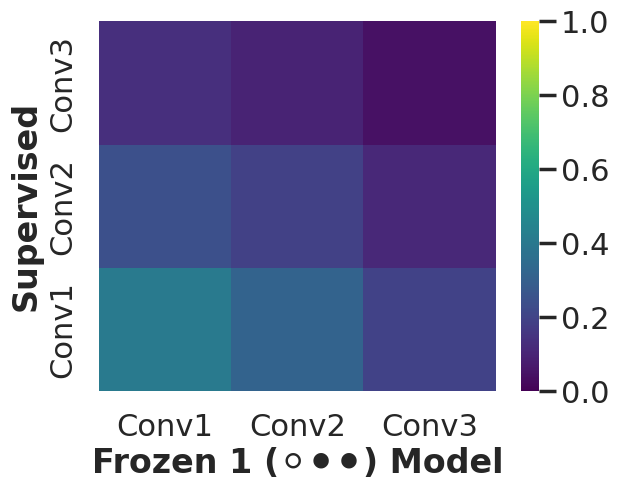

In [13]:
sim3 = compare_activations(supervised, frozen_1, np_train[0][:3670], type=similarity_function)
sim3 = sim3[visible_layers]
sim3 = sim3[:, visible_layers]
ax = sns.heatmap(sim3, annot=False, vmin=0, vmax=1, xticklabels=names, yticklabels=names, cmap='viridis')
ax.set(xlabel='Frozen 1 (⚪⚫⚫) Model', ylabel='Supervised')
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
ax.invert_yaxis()
plt.savefig(os.path.join('results', data_folder, 'supervised-frozen1-{}.pdf'.format(similarity_function)), bbox_inches='tight', transparent=True)
plt.savefig(os.path.join('results', data_folder, 'supervised-frozen1-{}.png'.format(similarity_function)), bbox_inches='tight', transparent=True)

## Supervised vs. Frozen (Middle only)

100%|██████████| 11/11 [10:14<00:00, 55.86s/it]


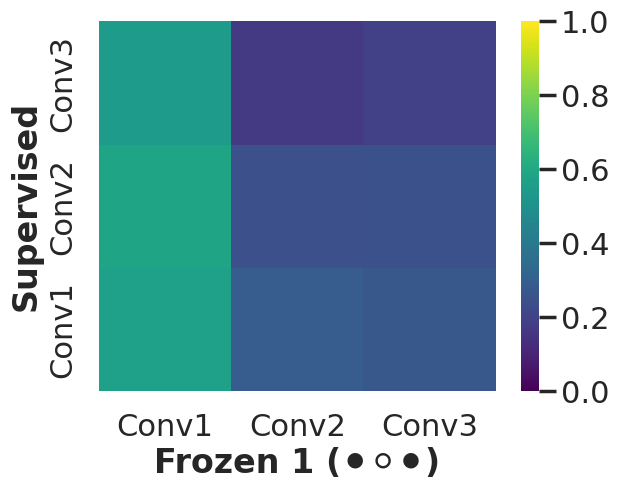

In [37]:
sim4 = compare_activations(supervised, frozen_1_m, np_train[0][:3670], type=similarity_function)
sim4 = sim4[visible_layers]
sim4 = sim4[:,visible_layers]
ax = sns.heatmap(sim4, annot=False, vmin=0, vmax=1, xticklabels=names, yticklabels=names, cmap='viridis')
ax.set(xlabel='Frozen 1 (⚫⚪⚫)', ylabel='Supervised')
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
ax.invert_yaxis()
plt.savefig(os.path.join('results', data_folder, 'supervised-frozen1m-{}.pdf'.format(similarity_function)), bbox_inches='tight', transparent=True)
plt.savefig(os.path.join('results', data_folder, 'supervised-frozen1m-{}.png'.format(similarity_function)), bbox_inches='tight', transparent=True)

## Supervised vs. Frozen (First-Middle)

100%|██████████| 11/11 [00:46<00:00,  4.20s/it]


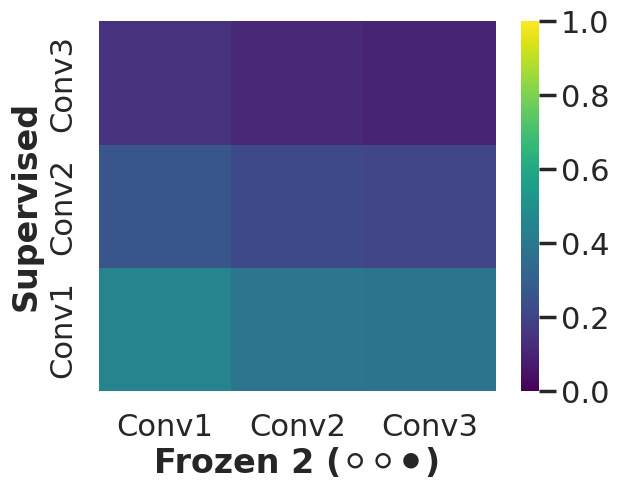

In [59]:
sim5 = compare_activations(supervised, frozen_2, np_train[0][:1280], type=similarity_function)
sim5 = sim5[visible_layers]
sim5 = sim5[:,visible_layers]
ax = sns.heatmap(sim5, annot=False, vmin=0, vmax=1, xticklabels=names, yticklabels=names, cmap='viridis')
ax.set(xlabel='Frozen 2 (⚪⚪⚫)', ylabel='Supervised')
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
ax.invert_yaxis()
plt.savefig(os.path.join('results', data_folder, 'supervised-frozen2-{}.pdf'.format(similarity_function)), bbox_inches='tight', transparent=True)
plt.savefig(os.path.join('results', data_folder, 'supervised-frozen2-{}.png'.format(similarity_function)), bbox_inches='tight', transparent=True)

## Supervised vs. Frozen (First-Last)

100%|██████████| 11/11 [00:37<00:00,  3.42s/it]


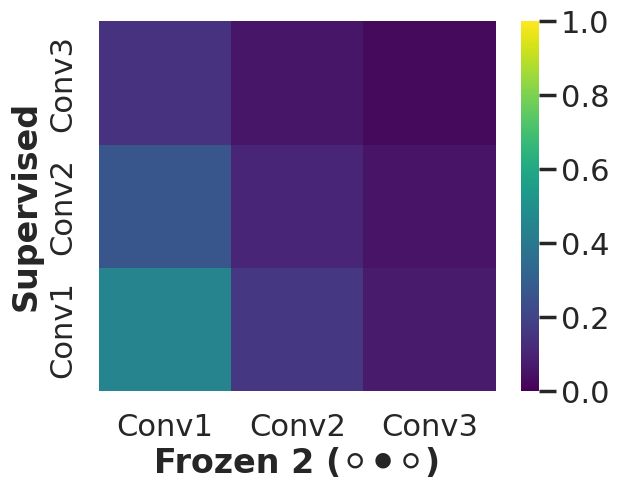

In [60]:
sim6 = compare_activations(supervised, frozen_2_fl, np_train[0][:1280], type=similarity_function)
sim6 = sim6[visible_layers]
sim6 = sim6[:,visible_layers]
ax = sns.heatmap(sim6, annot=False, vmin=0, vmax=1, xticklabels=names, yticklabels=names, cmap='viridis')
ax.set(xlabel='Frozen 2 (⚪⚫⚪)', ylabel='Supervised')
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
ax.invert_yaxis()
plt.savefig(os.path.join('results', data_folder, 'supervised-frozen2fl-{}.pdf'.format(similarity_function)), bbox_inches='tight', transparent=True)
plt.savefig(os.path.join('results', data_folder, 'supervised-frozen2fl-{}.png'.format(similarity_function)), bbox_inches='tight', transparent=True)

## Supervised vs. Frozen (First-Middle-Last)

100%|██████████| 11/11 [00:41<00:00,  3.79s/it]


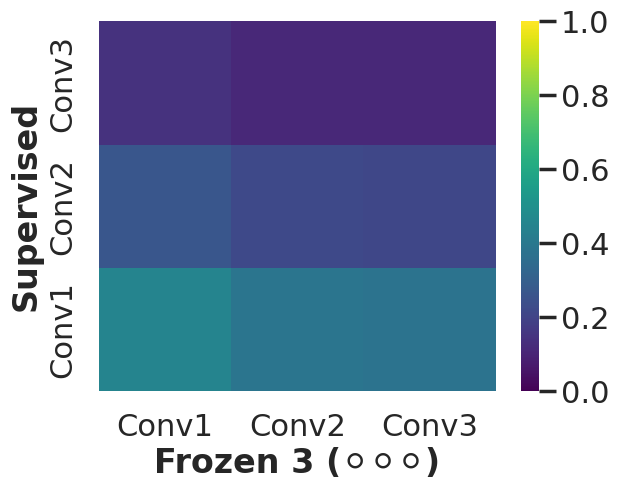

In [61]:
sim7 = compare_activations(supervised, frozen_3, np_train[0][:1280], type=similarity_function)
sim7 = sim7[visible_layers]
sim7 = sim7[:,visible_layers]
ax = sns.heatmap(sim7, annot=False, vmin=0, vmax=1, xticklabels=names, yticklabels=names, cmap='viridis')
ax.set(xlabel='Frozen 3 (⚪⚪⚪)', ylabel='Supervised')
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
ax.invert_yaxis()
plt.savefig(os.path.join('results', data_folder, 'supervised-frozen3-{}.pdf'.format(similarity_function)), bbox_inches='tight', transparent=True)
plt.savefig(os.path.join('results', data_folder, 'supervised-frozen3-{}.png'.format(similarity_function)), bbox_inches='tight', transparent=True)

Overall, all comparisons between the supervised and the SimCLR models show very low similarities between their layers. Only the first layer of the supervised model has similarities with the SimCLR layers, especially the first.

100%|██████████| 11/11 [00:43<00:00,  3.92s/it]


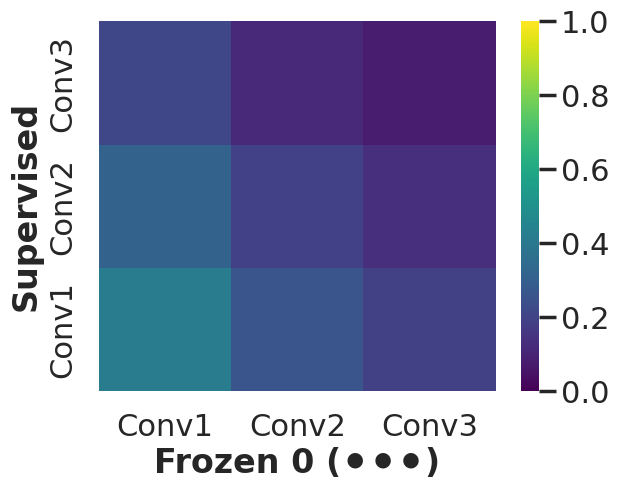

In [62]:
sim8 = compare_activations(supervised, frozen_0, np_train[0][:1280], type=similarity_function)
sim8 = sim8[visible_layers]
sim8 = sim8[:,visible_layers]

ax = sns.heatmap(sim8, annot=False, vmin=0, vmax=1, xticklabels=names, yticklabels=names, cmap='viridis')
ax.set(xlabel='Frozen 0 (⚫⚫⚫)', ylabel='Supervised')
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
ax.invert_yaxis()
plt.savefig(os.path.join('results', data_folder, 'supervised-frozen0-{}.pdf'.format(similarity_function)), bbox_inches='tight', transparent=True)
plt.savefig(os.path.join('results', data_folder, 'supervised-frozen0-{}.png'.format(similarity_function)), bbox_inches='tight', transparent=True)

This is troubling; I expected that when I re-train all convolution layers of the SimCLR model (frozen layers=0), then the similarity with the supervised model's layers would be greater. But that doesn't seem to be the case?

## Validation

100%|██████████| 11/11 [00:41<00:00,  3.77s/it]


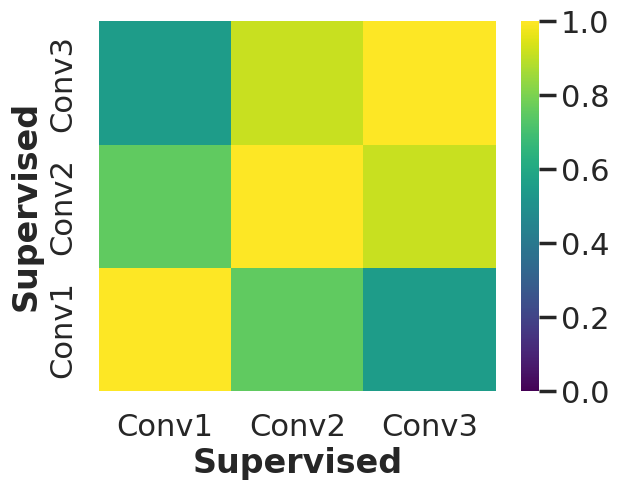

In [63]:
sim = compare_activations(supervised, supervised, np_train[0][:1280], type='cka')
sim = sim[visible_layers]
sim = sim[:,visible_layers]

ax = sns.heatmap(sim, annot=False, vmin=0, vmax=1, xticklabels=names, yticklabels=names, cmap='viridis')
ax.set(xlabel='Supervised', ylabel='Supervised')
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
ax.invert_yaxis()
plt.savefig(os.path.join('results', data_folder, 'supervised-supervised-cka.pdf'), bbox_inches='tight', transparent=True)
plt.savefig(os.path.join('results', data_folder, 'supervised-supervised-cka.png'), bbox_inches='tight', transparent=True)

100%|██████████| 11/11 [00:37<00:00,  3.42s/it]


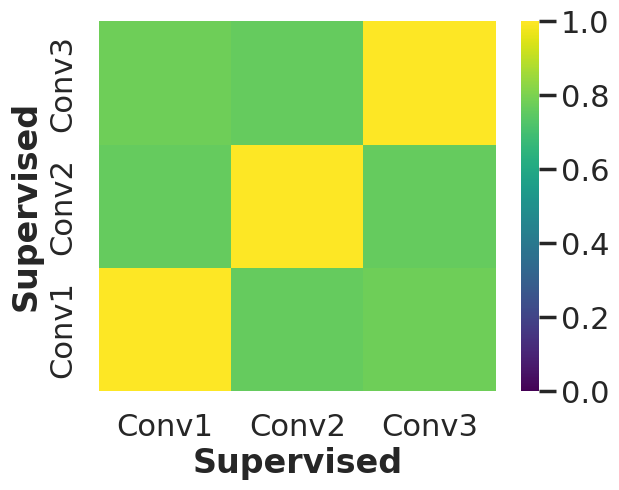

In [64]:
sim = compare_activations(supervised, supervised, np_train[0][:1280], type='cca')
sim = sim[visible_layers]
sim = sim[:,visible_layers]

ax = sns.heatmap(sim, annot=False, vmin=0, vmax=1, xticklabels=names, yticklabels=names, cmap='viridis')
ax.set(xlabel='Supervised', ylabel='Supervised')
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
ax.invert_yaxis()
plt.savefig(os.path.join('results', data_folder, 'supervised-supervised-cca.pdf'), bbox_inches='tight', transparent=True)
plt.savefig(os.path.join('results', data_folder, 'supervised-supervised-cca.png'), bbox_inches='tight', transparent=True)

## Comparison between self-supervised models

100%|██████████| 11/11 [00:36<00:00,  3.30s/it]


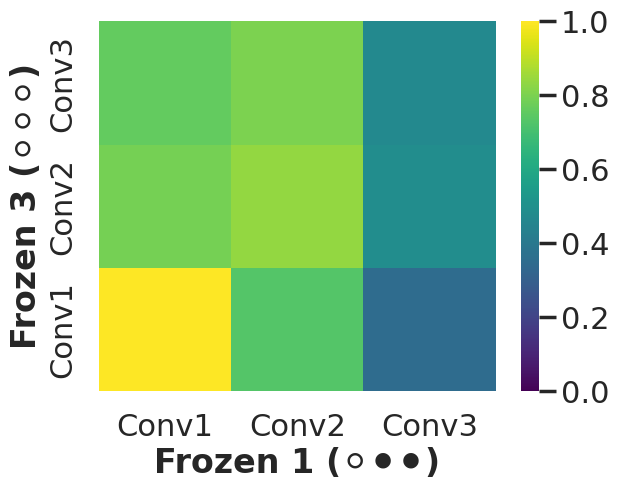

In [65]:
sim = compare_activations(frozen_3, frozen_1, np_train[0][:1280], type=similarity_function)
sim = sim[visible_layers]
sim = sim[:,visible_layers]
ax = sns.heatmap(sim, annot=False, vmin=0, vmax=1, xticklabels=names, yticklabels=names, cmap='viridis')
ax.set(xlabel='Frozen 1 (⚪⚫⚫)', ylabel='Frozen 3 (⚪⚪⚪)')
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
ax.invert_yaxis()
plt.savefig(os.path.join('results', data_folder, 'frozen3-frozen1-{}.pdf'.format(similarity_function)), bbox_inches='tight', transparent=True)
plt.savefig(os.path.join('results', data_folder, 'frozen3-frozen1-{}.png'.format(similarity_function)), bbox_inches='tight', transparent=True)

100%|██████████| 11/11 [00:35<00:00,  3.22s/it]


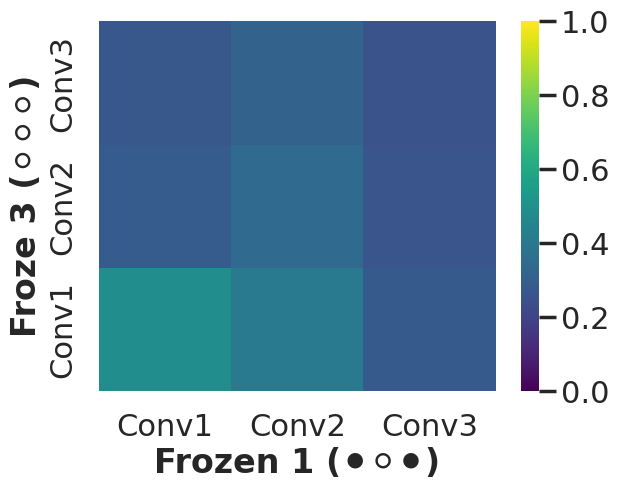

In [38]:
sim = compare_activations(frozen_3, frozen_1_m, np_train[0][:1280], type=similarity_function)
sim = sim[visible_layers]
sim = sim[:,visible_layers]
ax = sns.heatmap(sim, annot=False, vmin=0, vmax=1, xticklabels=names, yticklabels=names, cmap='viridis')
ax.set(xlabel='Frozen 1 (⚫⚪⚫)', ylabel='Froze 3 (⚪⚪⚪)')
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
ax.invert_yaxis()
plt.savefig(os.path.join('results', data_folder, 'frozen3-frozen1m-{}.pdf'.format(similarity_function)), bbox_inches='tight', transparent=True)
plt.savefig(os.path.join('results', data_folder, 'frozen3-frozen1m-{}.png'.format(similarity_function)), bbox_inches='tight', transparent=True)

100%|██████████| 11/11 [00:40<00:00,  3.70s/it]


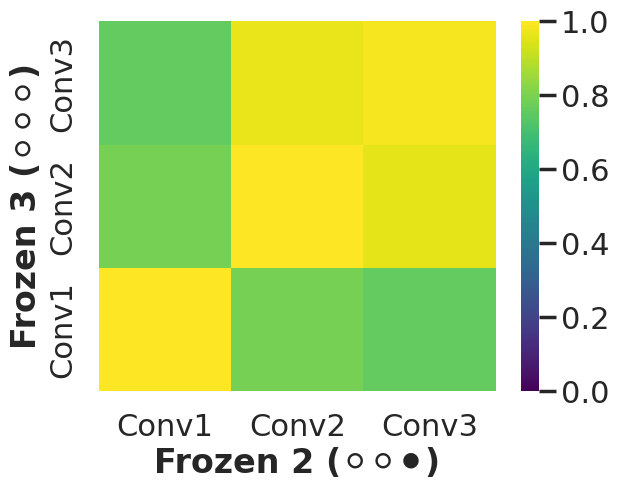

In [67]:
sim = compare_activations(frozen_3, frozen_2, np_train[0][:1280], type=similarity_function)
sim = sim[visible_layers]
sim = sim[:,visible_layers]
ax = sns.heatmap(sim, annot=False, vmin=0, vmax=1, xticklabels=names, yticklabels=names, cmap='viridis')
ax.set(xlabel='Frozen 2 (⚪⚪⚫)', ylabel='Frozen 3 (⚪⚪⚪)')
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
ax.invert_yaxis()
plt.savefig(os.path.join('results', data_folder, 'frozen3-frozen2-{}.pdf'.format(similarity_function)), bbox_inches='tight', transparent=True)
plt.savefig(os.path.join('results', data_folder, 'frozen3-frozen2-{}.png'.format(similarity_function)), bbox_inches='tight', transparent=True)

100%|██████████| 11/11 [00:38<00:00,  3.51s/it]


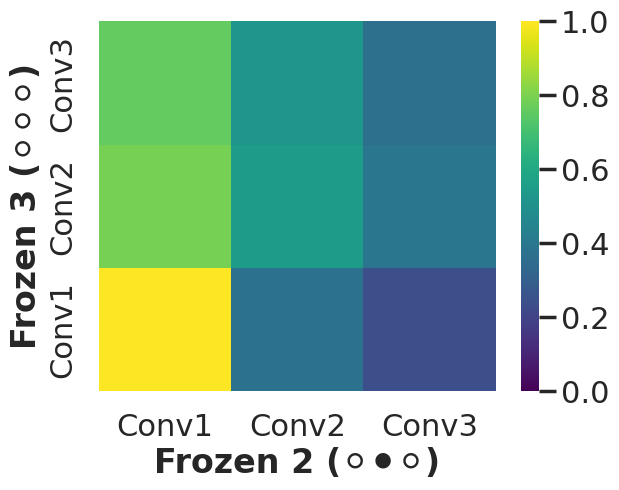

In [68]:
sim = compare_activations(frozen_3, frozen_2_fl, np_train[0][:1280], type=similarity_function)
sim = sim[visible_layers]
sim = sim[:,visible_layers]
ax = sns.heatmap(sim, annot=False, vmin=0, vmax=1, xticklabels=names, yticklabels=names, cmap='viridis')
ax.set(xlabel='Frozen 2 (⚪⚫⚪)', ylabel='Frozen 3 (⚪⚪⚪)')
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
ax.invert_yaxis()
plt.savefig(os.path.join('results', data_folder, 'frozen3-frozen2fl-{}.pdf'.format(similarity_function)), bbox_inches='tight', transparent=True)
plt.savefig(os.path.join('results', data_folder, 'frozen3-frozen2fl-{}.png'.format(similarity_function)), bbox_inches='tight', transparent=True)

100%|██████████| 11/11 [00:38<00:00,  3.51s/it]


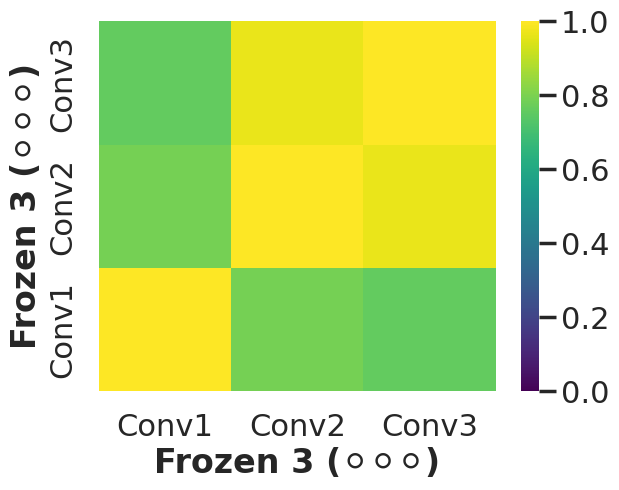

In [69]:
sim = compare_activations(frozen_3, frozen_3, np_train[0][:1280], type=similarity_function)
sim = sim[visible_layers]
sim = sim[:,visible_layers]
ax = sns.heatmap(sim, annot=False, vmin=0, vmax=1, xticklabels=names, yticklabels=names, cmap='viridis')
ax.set(xlabel='Frozen 3 (⚪⚪⚪)', ylabel='Frozen 3 (⚪⚪⚪)')
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
ax.invert_yaxis()
plt.savefig(os.path.join('results', data_folder, 'frozen3-frozen3-{}.pdf'.format(similarity_function)), bbox_inches='tight', transparent=True)
plt.savefig(os.path.join('results', data_folder, 'frozen3-frozen3-{}.png'.format(similarity_function)), bbox_inches='tight', transparent=True)

100%|██████████| 11/11 [00:40<00:00,  3.71s/it]


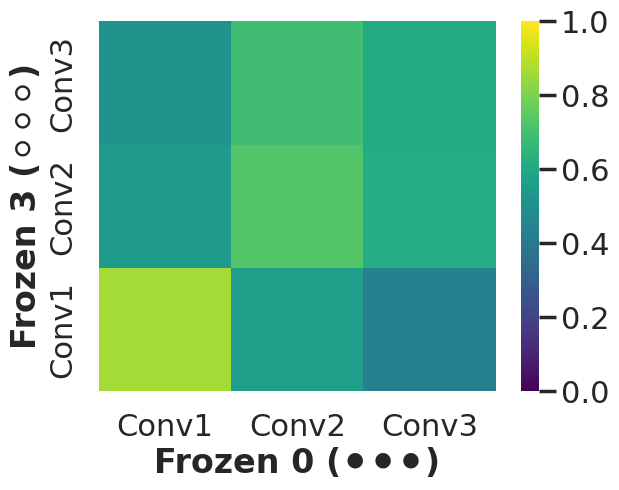

In [70]:
sim = compare_activations(frozen_3, frozen_0, np_train[0][:1280], type=similarity_function)
sim = sim[visible_layers]
sim = sim[:,visible_layers]
ax = sns.heatmap(sim, annot=False, vmin=0, vmax=1, xticklabels=names, yticklabels=names, cmap='viridis')
ax.set(xlabel='Frozen 0 (⚫⚫⚫)', ylabel='Frozen 3 (⚪⚪⚪)')
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
ax.invert_yaxis()
plt.savefig(os.path.join('results', data_folder, 'frozen3-frozen0-{}.pdf'.format(similarity_function)), bbox_inches='tight', transparent=True)
plt.savefig(os.path.join('results', data_folder, 'frozen3-frozen0-{}.png'.format(similarity_function)), bbox_inches='tight', transparent=True)

# Conditioned CKA

In [10]:
train_listfile.head(30)

,y_true,SUBJECT_ID,LANGUAGE,INSURANCE,RELIGION,ETHNICITY,GENDER,AGE
0,0,12797,ENGL,Medicare,JEWISH,WHITE,F,0
1,0,9027,NaN,Private,UNOBTAINABLE,UNKNOWN/NOT SPECIFIED,M,1
2,0,40386,ENGL,Medicare,PROTESTANT QUAKER,WHITE,F,0
3,0,48770,ENGL,Self Pay,NOT SPECIFIED,WHITE,M,1
4,0,14037,NaN,Private,CATHOLIC,WHITE,M,1
5,1,15656,NaN,Medicare,CATHOLIC,WHITE,F,0
6,1,83338,ENGL,Medicare,NOT SPECIFIED,WHITE - EASTERN EUROPEAN,F,0
7,0,21827,NaN,Medicare,UNOBTAINABLE,UNKNOWN/NOT SPECIFIED,M,0
8,0,20226,ENGL,Medicare,CATHOLIC,WHITE,F,0
9,1,26578,NaN,Medicare,CATHOLIC,WHITE,M,0


In [11]:
train_listfile.ETHNICITY.value_counts()

WHITE                                         10295
BLACK/AFRICAN AMERICAN                         1320
UNKNOWN/NOT SPECIFIED                          1251
OTHER                                           357
HISPANIC OR LATINO                              336
UNABLE TO OBTAIN                                239
ASIAN                                           219
PATIENT DECLINED TO ANSWER                      134
HISPANIC/LATINO - PUERTO RICAN                   85
ASIAN - CHINESE                                  71
WHITE - RUSSIAN                                  50
BLACK/CAPE VERDEAN                               46
BLACK/HAITIAN                                    25
MULTI RACE ETHNICITY                             23
PORTUGUESE                                       23
WHITE - OTHER EUROPEAN                           23
HISPANIC/LATINO - DOMINICAN                      22
ASIAN - ASIAN INDIAN                             22
WHITE - BRAZILIAN                                21
BLACK/AFRICA

## Ethnicity

In [12]:
# white
f_np_train = np_train[0][train_listfile.ETHNICITY == "WHITE"]
f_np_train = f_np_train[:3670]
# black
m_np_train = np_train[0][train_listfile.ETHNICITY == "BLACK/AFRICAN AMERICAN"]
m_np_train = m_np_train[:3670]
# hispanic
# males
h_np_train = np_train[0][train_listfile.ETHNICITY == "HISPANIC OR LATINO"]
h_np_train = h_np_train[:3670]

100%|██████████| 11/11 [11:23<00:00, 62.17s/it]
findfont: Font family ['Work Sans Regural'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Work Sans Regural'] not found. Falling back to DejaVu Sans.


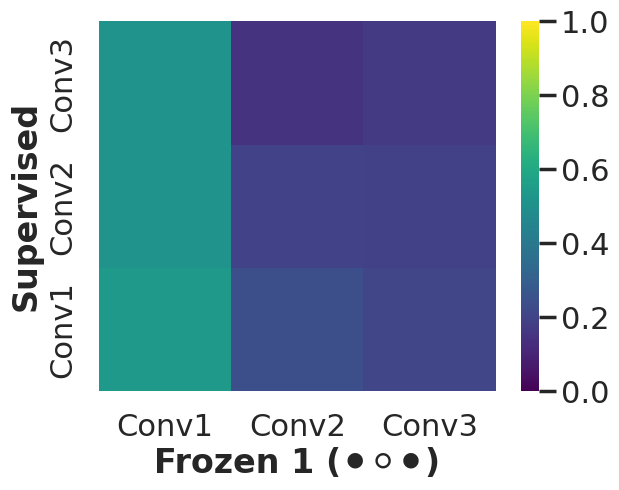

In [14]:
sim4 = compare_activations(supervised, frozen_1_m, f_np_train, type=similarity_function)
sim4 = sim4[visible_layers]
sim4 = sim4[:,visible_layers]
ax = sns.heatmap(sim4, annot=False, vmin=0, vmax=1, xticklabels=names, yticklabels=names, cmap='viridis')
ax.set(xlabel='Frozen 1 (⚫⚪⚫)', ylabel='Supervised')
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
ax.invert_yaxis()
plt.savefig(os.path.join('results', data_folder, 'supervised-frozen1m-{}-white.pdf'.format(similarity_function)), bbox_inches='tight', transparent=True)
plt.savefig(os.path.join('results', data_folder, 'supervised-frozen1m-{}-white.png'.format(similarity_function)), bbox_inches='tight', transparent=True)

In [15]:
sim4

array([[0.53695678, 0.2395345 , 0.20810197],
       [0.51554335, 0.19609144, 0.18931064],
       [0.51207999, 0.14819579, 0.16724921]])

100%|██████████| 11/11 [00:38<00:00,  3.46s/it]
C:\Users\syfan\PycharmProjects\TFC-pretraining\venv\lib\site-packages\matplotlib\backends\_backend_pdf_ps.py:62: RuntimeWarning: Glyph 9899 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)
C:\Users\syfan\PycharmProjects\TFC-pretraining\venv\lib\site-packages\matplotlib\backends\_backend_pdf_ps.py:62: RuntimeWarning: Glyph 9898 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)
C:\Users\syfan\PycharmProjects\TFC-pretraining\venv\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 9899 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\syfan\PycharmProjects\TFC-pretraining\venv\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 9898 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\syfan\PycharmProjects\TFC-pretraining\venv\lib\site-packages\matplotlib\backends\backend_agg.py:1

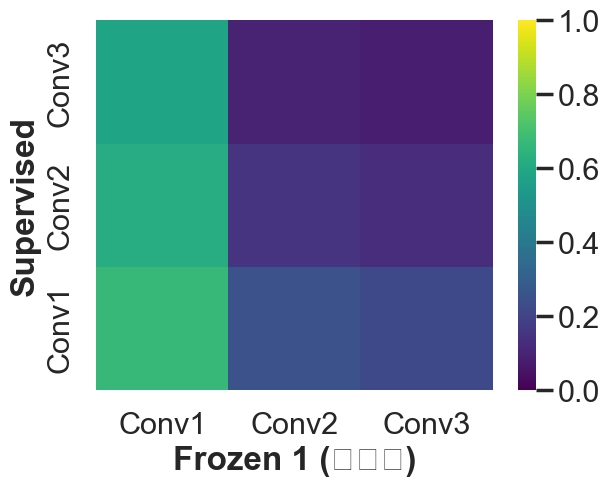

In [18]:
sim5 = compare_activations(supervised, frozen_1_m, m_np_train, type=similarity_function)
sim5 = sim5[visible_layers]
sim5 = sim5[:,visible_layers]
ax = sns.heatmap(sim5, annot=False, vmin=0, vmax=1, xticklabels=names, yticklabels=names, cmap='viridis')
ax.set(xlabel='Frozen 1 (⚫⚪⚫)', ylabel='Supervised')
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
ax.invert_yaxis()
plt.savefig(os.path.join('results', data_folder, 'supervised-frozen1m-{}-black.pdf'.format(similarity_function)), bbox_inches='tight', transparent=True)
plt.savefig(os.path.join('results', data_folder, 'supervised-frozen1m-{}-black.png'.format(similarity_function)), bbox_inches='tight', transparent=True)

In [20]:
sim5

array([[0.67111871, 0.2520872 , 0.22048526],
       [0.62177724, 0.15065367, 0.12655432],
       [0.58554902, 0.09630619, 0.08234388]])

100%|██████████| 11/11 [00:00<00:00, 113.33it/s]

100%|██████████| 11/11 [00:00<00:00, 125.70it/s]

100%|██████████| 11/11 [00:00<00:00, 130.76it/s]

100%|██████████| 11/11 [00:01<00:00,  9.15it/s]
C:\Users\syfan\PycharmProjects\TFC-pretraining\venv\lib\site-packages\matplotlib\backends\_backend_pdf_ps.py:62: RuntimeWarning: Glyph 9899 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)
C:\Users\syfan\PycharmProjects\TFC-pretraining\venv\lib\site-packages\matplotlib\backends\_backend_pdf_ps.py:62: RuntimeWarning: Glyph 9898 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)
C:\Users\syfan\PycharmProjects\TFC-pretraining\venv\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 9899 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\syfan\PycharmProjects\TFC-pretraining\venv\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 9898 missing from current

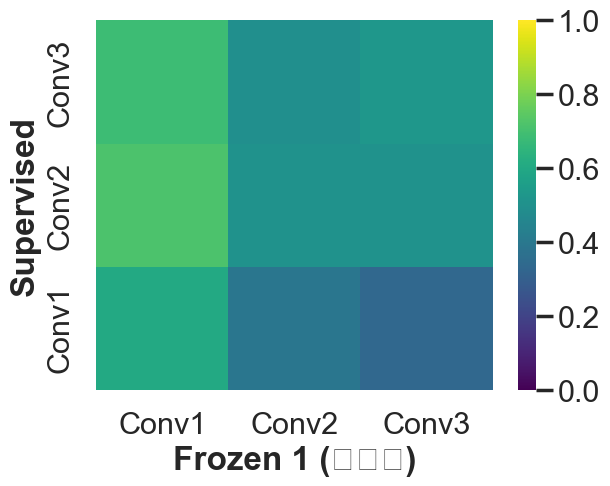

In [21]:
sim4 = compare_activations(supervised, frozen_1_m, h_np_train, type=similarity_function)
sim4 = sim4[visible_layers]
sim4 = sim4[:,visible_layers]
ax = sns.heatmap(sim4, annot=False, vmin=0, vmax=1, xticklabels=names, yticklabels=names, cmap='viridis')
ax.set(xlabel='Frozen 1 (⚫⚪⚫)', ylabel='Supervised')
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
ax.invert_yaxis()
plt.savefig(os.path.join('results', data_folder, 'supervised-frozen1m-{}-hispanic.pdf'.format(similarity_function)), bbox_inches='tight', transparent=True)
plt.savefig(os.path.join('results', data_folder, 'supervised-frozen1m-{}-hispanic.png'.format(similarity_function)), bbox_inches='tight', transparent=True)

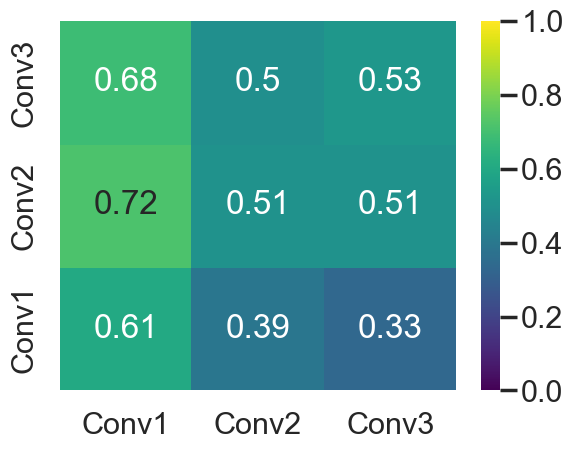

In [30]:
ax = sns.heatmap(sim4, annot=True, vmin=0, vmax=1, xticklabels=names, yticklabels=names, cmap='viridis')
ax.invert_yaxis()
#hispanic

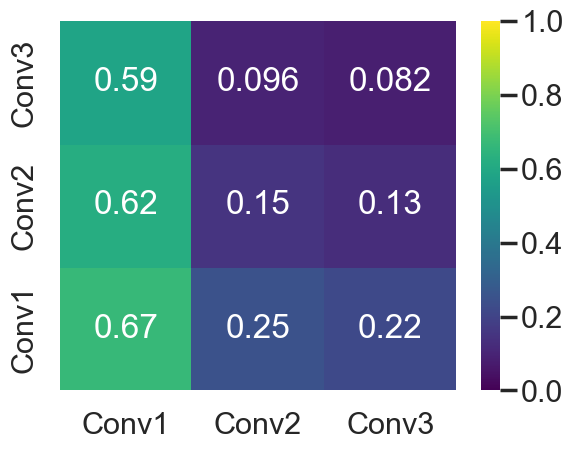

In [31]:
ax = sns.heatmap(sim5, annot=True, vmin=0, vmax=1, xticklabels=names, yticklabels=names, cmap='viridis') 
ax.invert_yaxis()
# black

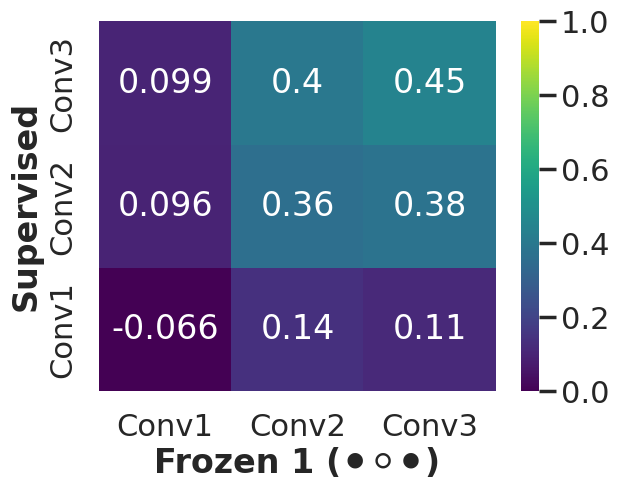

In [37]:
sim_diff = sim4-sim5
ax = sns.heatmap(sim_diff, annot=True, vmin=0, vmax=1, xticklabels=names, yticklabels=names, cmap='viridis')
ax.set(xlabel='Frozen 1 (⚫⚪⚫)', ylabel='Supervised')
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
ax.invert_yaxis()
plt.savefig(os.path.join('results', data_folder, 'diff-supervised-frozen1m-{}-hispanic-black.pdf'.format(similarity_function)), bbox_inches='tight', transparent=True)
plt.savefig(os.path.join('results', data_folder, 'diff-supervised-frozen1m-{}-hispanic-black.png'.format(similarity_function)), bbox_inches='tight', transparent=True)

In [14]:
def cka_diff(sim4, sim5, g4, g5):
    sim_diff = sim4-sim5
    ax = sns.heatmap(sim_diff, annot=True, vmin=0, vmax=1, xticklabels=names, yticklabels=names, cmap='viridis')
    ax.set(xlabel='Frozen 1 (⚫⚪⚫)', ylabel='Supervised')
    ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
    ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
    ax.invert_yaxis()
    plt.savefig(os.path.join('results', data_folder, 'diff-supervised-frozen1m-{}-{}-{}.pdf'.format(similarity_function, g4, g5)), bbox_inches='tight', transparent=True)
    plt.savefig(os.path.join('results', data_folder, 'diff-supervised-frozen1m-{}-{}-{}.png'.format(similarity_function, g4, g5)), bbox_inches='tight', transparent=True)

In [12]:
# balanced
h_np_train = f_np_train[:336]
m_np_train = f_np_train[:336]
np_train = np.concatenate((h_np_train, m_np_train))
np.random.shuffle(np_train)
print("Hispanic: {}, Black: {}, All: {}".format(h_np_train.shape, m_np_train.shape, np_train.shape))

Hispanic: (336, 48, 76), Black: (336, 48, 76), All: (672, 48, 76)


100%|██████████| 11/11 [00:06<00:00,  1.69it/s]
findfont: Font family ['Work Sans Regural'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Work Sans Regural'] not found. Falling back to DejaVu Sans.


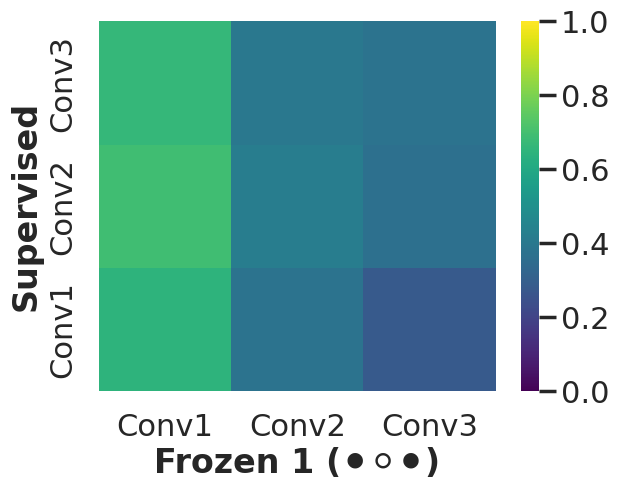

In [13]:
sim4 = compare_activations(supervised, frozen_1_m, np_train, type=similarity_function)
sim4 = sim4[visible_layers]
sim4 = sim4[:,visible_layers]
ax = sns.heatmap(sim4, annot=False, vmin=0, vmax=1, xticklabels=names, yticklabels=names, cmap='viridis')
ax.set(xlabel='Frozen 1 (⚫⚪⚫)', ylabel='Supervised')
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
ax.invert_yaxis()
plt.savefig(os.path.join('results', data_folder, 'supervised-frozen1m-{}-ethnicity-balanced-random.pdf'.format(similarity_function)), bbox_inches='tight', transparent=True)
plt.savefig(os.path.join('results', data_folder, 'supervised-frozen1m-{}-ethnicity-balanced-random.png'.format(similarity_function)), bbox_inches='tight', transparent=True)

## Insurance

In [9]:
train_listfile.INSURANCE.value_counts()

Medicare      8791
Private       4172
Medicaid      1252
Government     344
Self Pay       122
Name: INSURANCE, dtype: int64

In [13]:
# medicaid
f_np_train = np_train[0][train_listfile.INSURANCE == "Medicaid"]
f_np_train = f_np_train[:1252]
# self-pay
m_np_train = np_train[0][train_listfile.INSURANCE == "Self Pay"]
m_np_train = m_np_train[:1252]

100%|██████████| 11/11 [00:37<00:00,  3.39s/it]


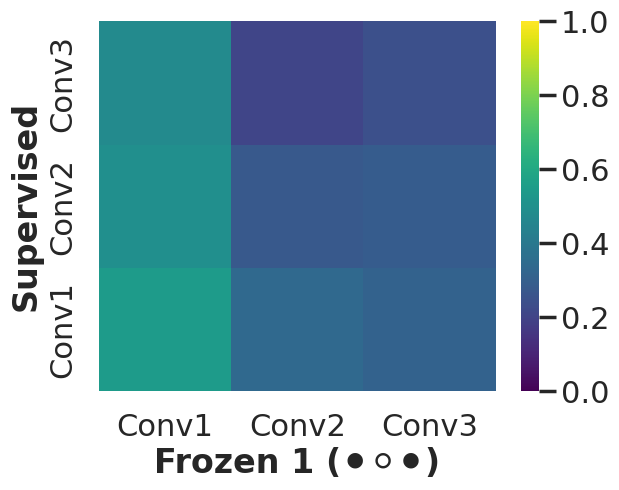

In [14]:
sim4 = compare_activations(supervised, frozen_1_m, f_np_train, type=similarity_function)
sim4 = sim4[visible_layers]
sim4 = sim4[:,visible_layers]
ax = sns.heatmap(sim4, annot=False, vmin=0, vmax=1, xticklabels=names, yticklabels=names, cmap='viridis')
ax.set(xlabel='Frozen 1 (⚫⚪⚫)', ylabel='Supervised')
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
ax.invert_yaxis()
plt.savefig(os.path.join('results', data_folder, 'supervised-frozen1m-{}-medicaid.pdf'.format(similarity_function)), bbox_inches='tight', transparent=True)
plt.savefig(os.path.join('results', data_folder, 'supervised-frozen1m-{}-medicaid.png'.format(similarity_function)), bbox_inches='tight', transparent=True)

100%|██████████| 11/11 [00:00<00:00, 208.44it/s]

100%|██████████| 11/11 [00:00<00:00, 238.05it/s]

100%|██████████| 11/11 [00:00<00:00, 261.85it/s]

100%|██████████| 11/11 [00:00<00:00, 366.66it/s]

100%|██████████| 11/11 [00:00<00:00, 439.55it/s]

100%|██████████| 11/11 [00:00<00:00, 366.24it/s]

100%|██████████| 11/11 [00:00<00:00, 439.99it/s]

100%|██████████| 11/11 [00:00<00:00, 25.97it/s]


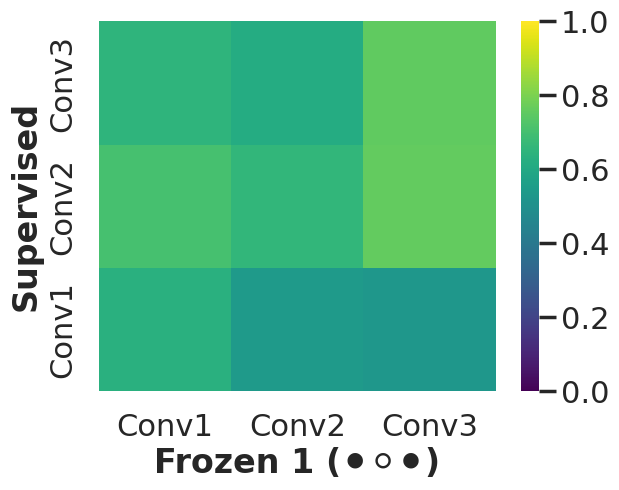

In [18]:
sim5 = compare_activations(supervised, frozen_1_m, m_np_train, type=similarity_function)
sim5 = sim5[visible_layers]
sim5 = sim5[:,visible_layers]
ax = sns.heatmap(sim5, annot=False, vmin=0, vmax=1, xticklabels=names, yticklabels=names, cmap='viridis')
ax.set(xlabel='Frozen 1 (⚫⚪⚫)', ylabel='Supervised')
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
ax.invert_yaxis()
plt.savefig(os.path.join('results', data_folder, 'supervised-frozen1m-{}-selfpay.pdf'.format(similarity_function)), bbox_inches='tight', transparent=True)
plt.savefig(os.path.join('results', data_folder, 'supervised-frozen1m-{}-selfpay.png'.format(similarity_function)), bbox_inches='tight', transparent=True)

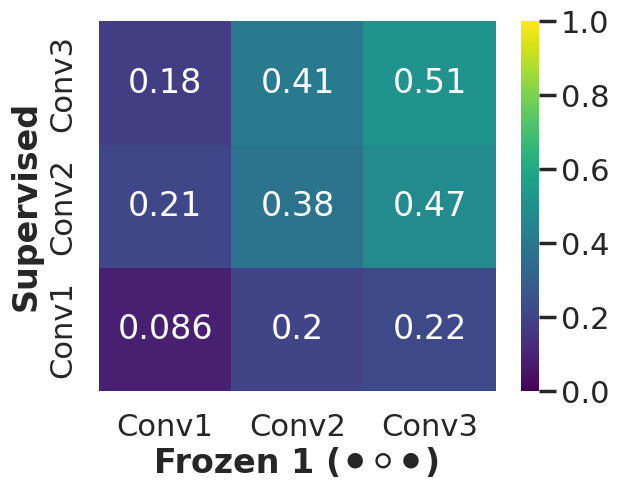

In [21]:
cka_diff(sim5, sim4, "Self Pay", "Medicaid")

In [18]:
np_train = np.concatenate((f_np_train, m_np_train))
np.random.shuffle(np_train)
print("Medicaid: {}, Self Pay: {}, All: {}".format(f_np_train.shape, m_np_train.shape, np_train.shape))

Medicaid: (3670, 48, 76), Self Pay: (336, 48, 76), All: (4006, 48, 76)


100%|██████████| 11/11 [13:04<00:00, 71.30s/it]


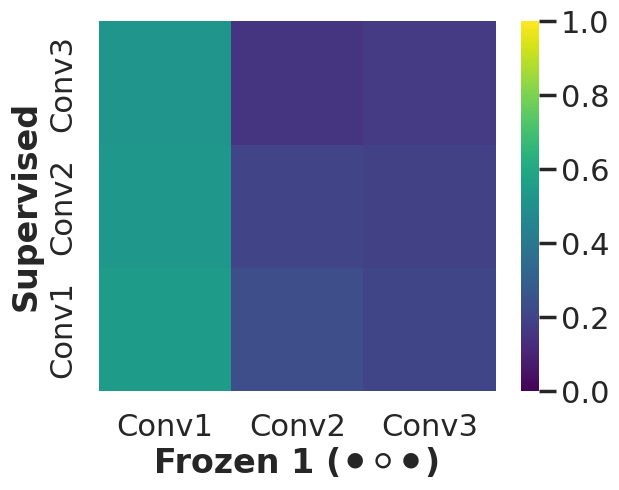

In [19]:
sim4 = compare_activations(supervised, frozen_1_m, np_train, type=similarity_function)
sim4 = sim4[visible_layers]
sim4 = sim4[:,visible_layers]
ax = sns.heatmap(sim4, annot=False, vmin=0, vmax=1, xticklabels=names, yticklabels=names, cmap='viridis')
ax.set(xlabel='Frozen 1 (⚫⚪⚫)', ylabel='Supervised')
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
ax.invert_yaxis()
plt.savefig(os.path.join('results', data_folder, 'supervised-frozen1m-{}-insurance-balanced-random.pdf'.format(similarity_function)), bbox_inches='tight', transparent=True)
plt.savefig(os.path.join('results', data_folder, 'supervised-frozen1m-{}-insurance-balanced-random.png'.format(similarity_function)), bbox_inches='tight', transparent=True)

## Language

In [22]:
train_listfile.LANGUAGE.value_counts()

ENGL    8309
SPAN     303
RUSS     217
PTUN     182
CANT     109
PORT      75
CAPE      68
HAIT      45
ITAL      43
VIET      35
MAND      30
GREE      28
ARAB      20
PERS      19
AMER      11
CAMB      10
ETHI       8
KORE       8
POLI       7
ALBA       6
HIND       6
*ARM       5
FREN       4
SOMA       4
LAOT       4
*CHI       3
*GUJ       3
*BUR       3
THAI       3
BENG       2
JAPA       2
*BEN       2
*URD       2
*CAN       2
*YID       2
*YOR       1
*TOY       1
*CDI       1
*PUN       1
*TEL       1
*KHM       1
*NEP       1
** T       1
*AMH       1
*MOR       1
*BUL       1
*MAN       1
*HUN       1
TURK       1
*ROM       1
*TOI       1
*LIT       1
**SH       1
Name: LANGUAGE, dtype: int64

In [23]:
# females
f_np_train = np_train[0][train_listfile.LANGUAGE != "ENGL"]
f_np_train = f_np_train[:3000]
# males
m_np_train = np_train[0][train_listfile.LANGUAGE == "ENGL"]
m_np_train = m_np_train[:3000]

100%|██████████| 11/11 [05:24<00:00, 29.47s/it]


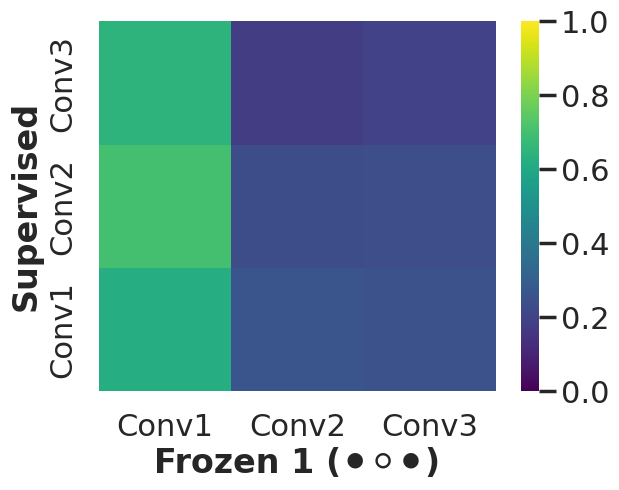

In [24]:
sim4 = compare_activations(supervised, frozen_1_m, f_np_train, type=similarity_function)
sim4 = sim4[visible_layers]
sim4 = sim4[:,visible_layers]
ax = sns.heatmap(sim4, annot=False, vmin=0, vmax=1, xticklabels=names, yticklabels=names, cmap='viridis')
ax.set(xlabel='Frozen 1 (⚫⚪⚫)', ylabel='Supervised')
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
ax.invert_yaxis()
plt.savefig(os.path.join('results', data_folder, 'supervised-frozen1m-{}-other.pdf'.format(similarity_function)), bbox_inches='tight', transparent=True)
plt.savefig(os.path.join('results', data_folder, 'supervised-frozen1m-{}-other.png'.format(similarity_function)), bbox_inches='tight', transparent=True)

100%|██████████| 11/11 [05:29<00:00, 30.00s/it]


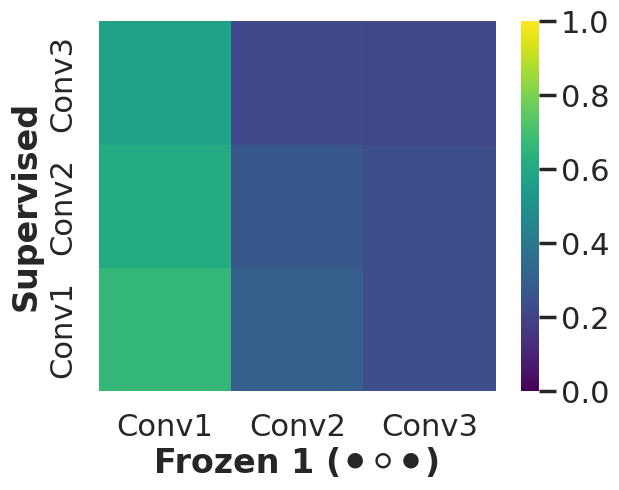

In [25]:
sim5 = compare_activations(supervised, frozen_1_m, m_np_train, type=similarity_function)
sim5 = sim5[visible_layers]
sim5 = sim5[:,visible_layers]
ax = sns.heatmap(sim5, annot=False, vmin=0, vmax=1, xticklabels=names, yticklabels=names, cmap='viridis')
ax.set(xlabel='Frozen 1 (⚫⚪⚫)', ylabel='Supervised')
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
ax.invert_yaxis()
plt.savefig(os.path.join('results', data_folder, 'supervised-frozen1m-{}-eng.pdf'.format(similarity_function)), bbox_inches='tight', transparent=True)
plt.savefig(os.path.join('results', data_folder, 'supervised-frozen1m-{}-eng.png'.format(similarity_function)), bbox_inches='tight', transparent=True)

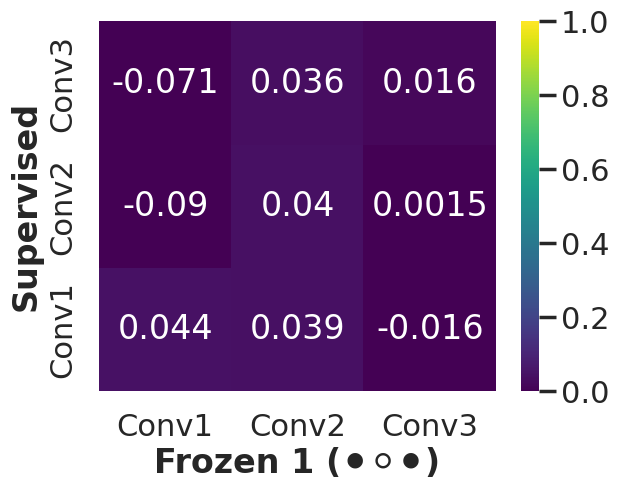

In [26]:
cka_diff(sim5, sim4, "English", "Non-English")

In [27]:
np_train = np.concatenate((f_np_train, m_np_train))
np.random.shuffle(np_train)
print("Other: {}, English: {}, All: {}".format(f_np_train.shape, m_np_train.shape, np_train.shape))

Other: (3000, 48, 76), English: (3000, 48, 76), All: (6000, 48, 76)


100%|██████████| 11/11 [37:42<00:00, 205.70s/it]


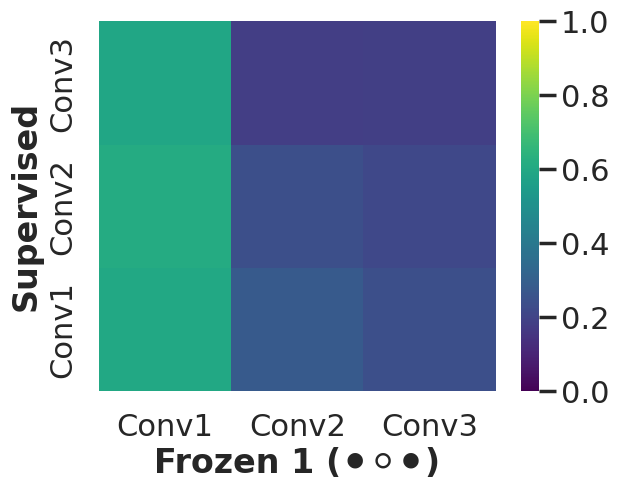

In [37]:
sim4 = compare_activations(supervised, frozen_1_m, np_train, type=similarity_function)
sim4 = sim4[visible_layers]
sim4 = sim4[:, visible_layers]
ax = sns.heatmap(sim4, annot=False, vmin=0, vmax=1, xticklabels=names, yticklabels=names, cmap='viridis')
ax.set(xlabel='Frozen 1 (⚫⚪⚫)', ylabel='Supervised')
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
ax.invert_yaxis()
plt.savefig(
    os.path.join('results', data_folder, 'supervised-frozen1m-{}-language-balanced-random.pdf'.format(similarity_function)),
    bbox_inches='tight', transparent=True)
plt.savefig(
    os.path.join('results', data_folder, 'supervised-frozen1m-{}-language-balanced-random.png'.format(similarity_function)),
    bbox_inches='tight', transparent=True)

## Gender

In [11]:
# females
f_np_train = np_train[0][train_listfile.GENDER == "F"]
f_np_train = f_np_train[:3670]
# males
m_np_train = np_train[0][train_listfile.GENDER == "M"]
m_np_train = m_np_train[:3670]

100%|██████████| 11/11 [09:36<00:00, 52.39s/it]


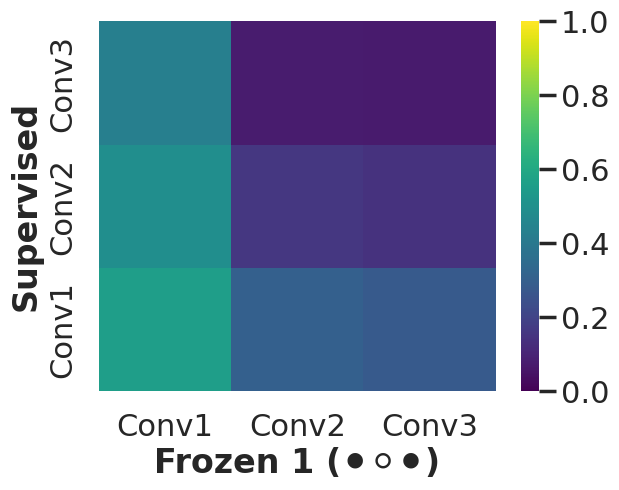

In [12]:
sim4 = compare_activations(supervised, frozen_1_m, f_np_train, type=similarity_function)
sim4 = sim4[visible_layers]
sim4 = sim4[:,visible_layers]
ax = sns.heatmap(sim4, annot=False, vmin=0, vmax=1, xticklabels=names, yticklabels=names, cmap='viridis')
ax.set(xlabel='Frozen 1 (⚫⚪⚫)', ylabel='Supervised')
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
ax.invert_yaxis()
plt.savefig(os.path.join('results', data_folder, 'supervised-frozen1m-{}-female.pdf'.format(similarity_function)), bbox_inches='tight', transparent=True)
plt.savefig(os.path.join('results', data_folder, 'supervised-frozen1m-{}-female.png'.format(similarity_function)), bbox_inches='tight', transparent=True)

100%|██████████| 11/11 [09:49<00:00, 53.60s/it]


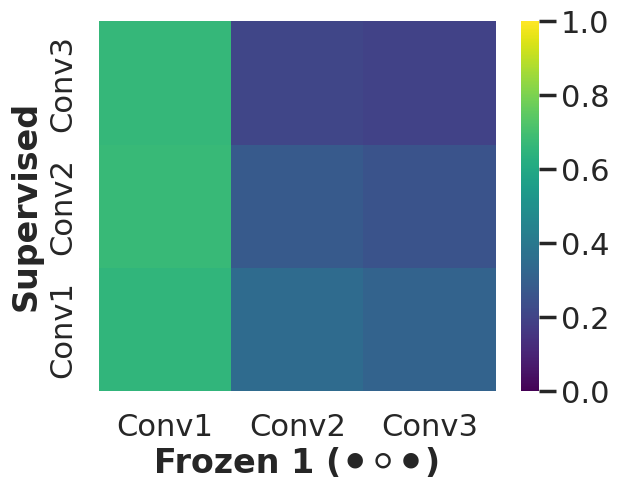

In [16]:
sim5 = compare_activations(supervised, frozen_1_m, m_np_train, type=similarity_function)
sim5 = sim5[visible_layers]
sim5 = sim5[:,visible_layers]
ax = sns.heatmap(sim5, annot=False, vmin=0, vmax=1, xticklabels=names, yticklabels=names, cmap='viridis')
ax.set(xlabel='Frozen 1 (⚫⚪⚫)', ylabel='Supervised')
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
ax.invert_yaxis()
plt.savefig(os.path.join('results', data_folder, 'supervised-frozen1m-{}-male.pdf'.format(similarity_function)), bbox_inches='tight', transparent=True)
plt.savefig(os.path.join('results', data_folder, 'supervised-frozen1m-{}-male.png'.format(similarity_function)), bbox_inches='tight', transparent=True)

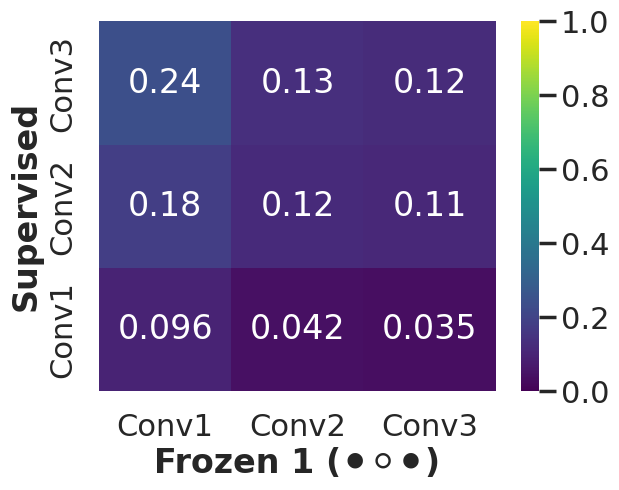

In [17]:
cka_diff(sim5, sim4, "Male", "Female")

In [14]:
np_train = np.concatenate((f_np_train, m_np_train))
np.random.shuffle(np_train)
print("F: {}, M: {}, All: {}".format(f_np_train.shape, m_np_train.shape, np_train.shape))

F: (3670, 48, 76), M: (3670, 48, 76), All: (7340, 48, 76)


100%|██████████| 11/11 [1:21:45<00:00, 445.97s/it]
findfont: Font family ['Work Sans Regural'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Work Sans Regural'] not found. Falling back to DejaVu Sans.


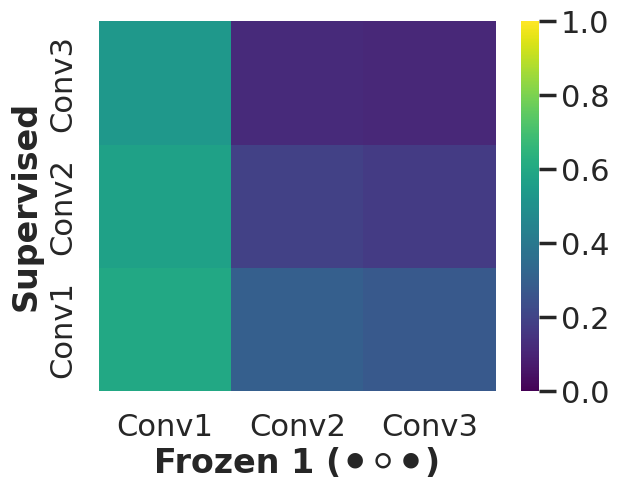

In [15]:
sim4 = compare_activations(supervised, frozen_1_m, np_train, type=similarity_function)
sim4 = sim4[visible_layers]
sim4 = sim4[:,visible_layers]
ax = sns.heatmap(sim4, annot=False, vmin=0, vmax=1, xticklabels=names, yticklabels=names, cmap='viridis')
ax.set(xlabel='Frozen 1 (⚫⚪⚫)', ylabel='Supervised')
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
ax.invert_yaxis()
plt.savefig(os.path.join('results', data_folder, 'supervised-frozen1m-{}-balanced-random.pdf'.format(similarity_function)), bbox_inches='tight', transparent=True)
plt.savefig(os.path.join('results', data_folder, 'supervised-frozen1m-{}-balanced-random.png'.format(similarity_function)), bbox_inches='tight', transparent=True)